# Titanic Dataset
## Objective: predict survival based on following variables
PassengerId -> unlikely to have any impact, numerical row ID <br>
Pclass (Passenger Class) -> 1st (1), 2nd (2), 3rd (3) <br>
Name (includes Title) <br>
Sex -> male, female <br>
Age -> numerical <br>
SibSp -> Number of Siblings / Spouse present <br>
Parch -> Number Parents/Children present <br>
Ticket -> Ticket Number <br>
Fare -> How much the person paid for ticket <br>
Cabin -> Cabin Number, includes deck as first letter, lots of missing values <br>
Embarked -> where passenger boarded (C=Cherbourg, Q = Queenstown, S = Southampton) <br>
<br>
<br>

## Things to do
1.0 - Plot Variables against survival rate (get a sense of which variables are likely to impact survival) <br>
2.0 - Deal with missing data: <br>
2.1 - Age: regress with other variables (e.g., K-Nearest Neighbours?) create age groups (roughly equally spaced bins, based on distribution) <br>
2.2 - Cabin: there may not be much point since so much data is missing but worth extracting deck, and converting to new variable <br>
2.3 - Embarked - replace NaNs with mode (very few missing values) <br>
3.0 - New variables: <br>
3.1 - Age: create age groupings? <br>
3.2 - Name: extract title and create new categorical variable <br>
4.0 - Fix datatypes, incl. categorical -> dummies (get_dummies, OneHotEncoder)






In [57]:
# Import initial modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Data
train = pd.read_csv('~/Documents/GitHub_Folder/titanic-kaggle/datasets/train.csv')
print(train.head())
print(train.info())
train_orig = train.copy() # create a copy in case I fuck it up
train.describe()

test = pd.read_csv('~/Documents/GitHub_Folder/titanic-kaggle/datasets/test.csv')
test_orig = test.copy() # create a copy in case I fuck it up
print(test.columns)



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

## Plot the data and get a sense of what is inside... (Pending) <br>

In [58]:
# Check current datatypes and get a sense of values
# print(train['PassengerId'].unique())
# print(train['Survived'].unique()) # 0 = no
# print(train['Pclass'].unique()) (category)
# print(train['Name'].unique()) (text)
# print(train['Sex'].unique()) (category)
# print(train['Age'].unique()) (float)
# print(train['SibSp'].unique()) # number of siblings on board (int)
# print(train['Parch'].unique()) # number of parents/children on board (int)
# print(train['Ticket'].unique()) # ticket number (number)
# print(train['Fare'].unique()) # Passenger Fare (amount paid)
# print(train['Cabin'].unique()) # Cabin Number (text)
# print(train['Embarked'].unique()) # C=Cherbourg, Q = Queenstown, S = Southampton

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


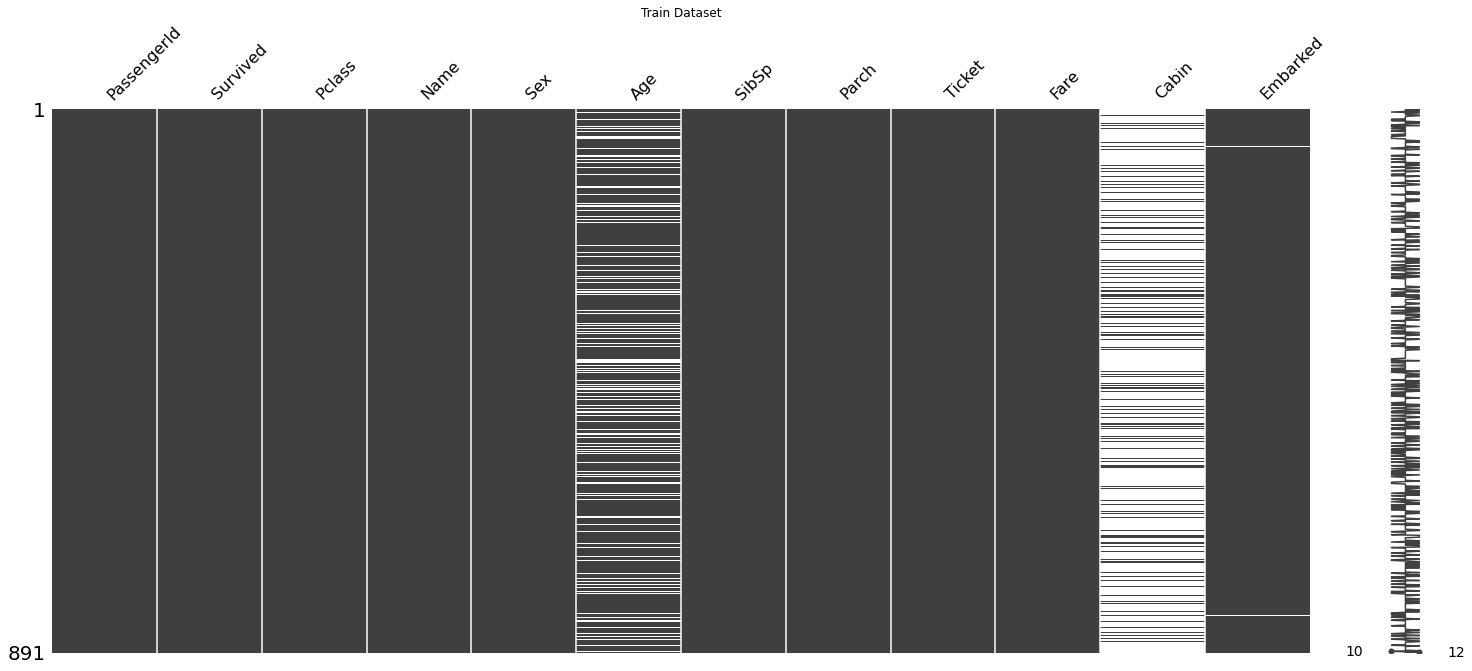

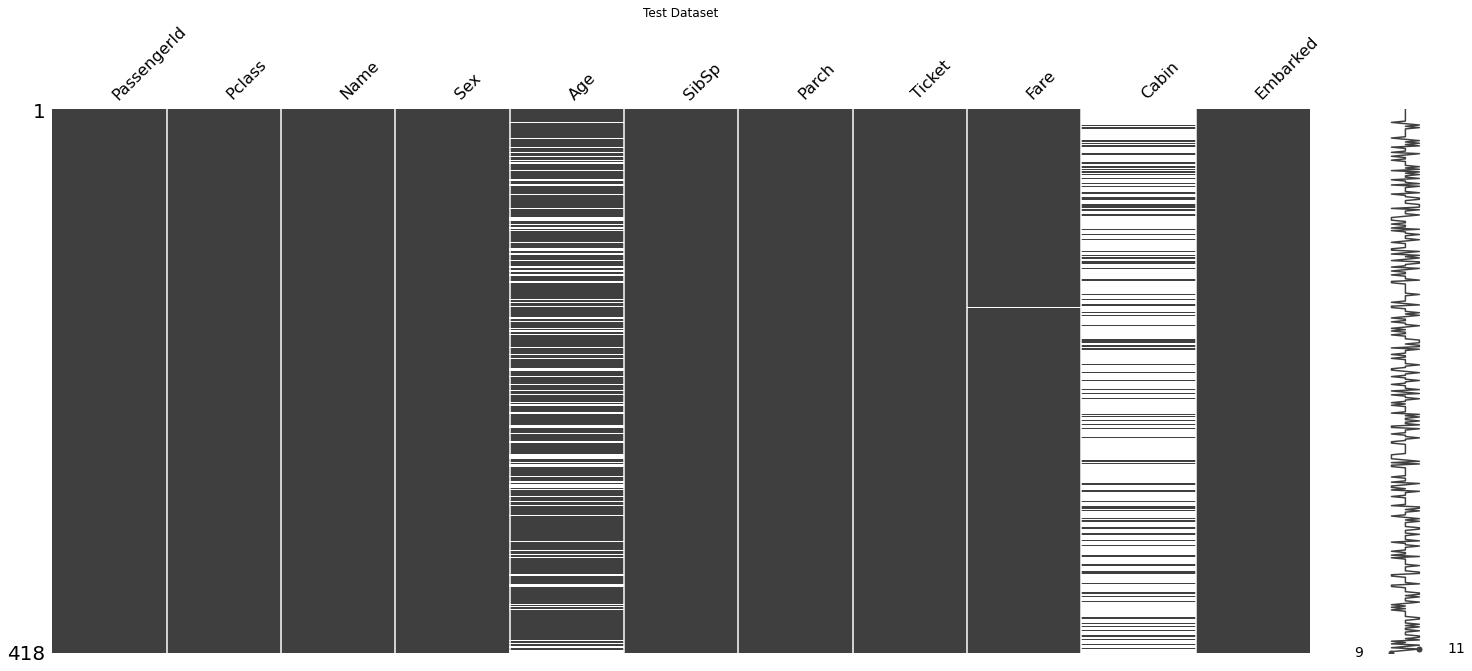

In [59]:
# Check for missing values
print(train.isna().sum())
print(test.isna().sum())

# Print out pretty picture
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(train)
plt.title('Train Dataset')
plt.show()
msno.matrix(test)
plt.title('Test Dataset')
plt.show()

Preliminary Data Cleaning (do on both train and test)
- remove PassengerId
- fix datatypes

In [60]:
# Drop PassengerId column from both Train and test
train.drop(['PassengerId'], axis=1, inplace=True)
print(train.info())
test.drop(['PassengerId'], axis=1, inplace=True)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 n

In [61]:
# Fix Datatypes (Train)
train['Sex'] = train['Sex'].astype('category')
train['Pclass'] = train['Pclass'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
train.info()

# Fix Datatypes (Test)
test['Sex'] = test['Sex'].astype('category')
test['Pclass'] = test['Pclass'].astype('category')
test['Embarked'] = test['Embarked'].astype('category')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 58.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    cat

## Let's work on name:

In [62]:
from nameparser import HumanName
names = train['Name'].astype(str)
train['Title'] = ""
for id in range(len(train)):
    tempname = HumanName(names[id])
    train['Title'][id] = tempname.title
print(train['Title'].unique())
print(train['Title'].value_counts())

['Mr.' 'Mrs.' 'Miss.' 'Master.' '' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Lady.'
 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'the Countess. of']
Mr.                 517
Miss.               182
Mrs.                125
Master.              40
Dr.                   7
Rev.                  6
                      4
Mlle.                 2
Col.                  2
Lady.                 1
Mme.                  1
Capt.                 1
the Countess. of      1
Sir.                  1
Ms.                   1
Name: Title, dtype: int64


/Users/aharrisonbell/PycharmProjects/titanic-kaggle-pycharm/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
# Now... try to convert title to Label Encoded Categorical (eventually will use OHE)
# titles = {'Mr.':1, 'Mrs.':2, 'Miss.':3, 'Master.':4, 'Rev.':5, 'Dr.':5, 'Mme.':6, 'Ms.':6, 'Lady.':6,
# 'Sir.':5, 'Mlle.':6, 'Col.':5, 'Capt.':5, 'the Countess. of':6]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train['Title_Cat'] = labelencoder.fit_transform(train['Title'])
print(labelencoder.classes_)

['' 'Capt.' 'Col.' 'Dr.' 'Lady.' 'Master.' 'Miss.' 'Mlle.' 'Mme.' 'Mr.'
 'Mrs.' 'Ms.' 'Rev.' 'Sir.' 'the Countess. of']


In [64]:
# Combine Certain Titles (to account for v. low counts):
male_titles = ('Dr.', 'Capt.', 'Col.','Master.', 'Rev.', 'Sir.') # set to 1 (Capt)
female_titles = ('Lady.', 'Mlle.', 'Mme.','the Countess. of') # set to 5 (Lady)
train.loc[train['Title'].isin(male_titles), 'Title_Cat' ] = 1
train.loc[train['Title'].isin(female_titles), 'Title_Cat' ] = 5
print(train.head(15))
print(train['Title_Cat'].unique())


    Survived Pclass                                               Name  \
0          0      3                            Braund, Mr. Owen Harris   
1          1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          1      3                             Heikkinen, Miss. Laina   
3          1      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          0      3                           Allen, Mr. William Henry   
5          0      3                                   Moran, Mr. James   
6          0      1                            McCarthy, Mr. Timothy J   
7          0      3                     Palsson, Master. Gosta Leonard   
8          1      3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9          1      2                Nasser, Mrs. Nicholas (Adele Achem)   
10         1      3                    Sandstrom, Miss. Marguerite Rut   
11         1      1                           Bonnell, Miss. Elizabeth   
12         0      3                   

In [ ]:
# will try: convert categoricals to dummies (get_dummies) then try KNN

In [ ]:
cat_features = ["Pclass", "Sex", "SibSp", "Parch"]



 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64
 7   Parch        891 non-null    int64
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])







## Fix Datatypes

In [ ]:
# Deal with missing data (cont'd)
# For age -> let's try to model the age based on other factors:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

temp_data = train.dropna(subset = ['Age']) # create temporary dataset without rows missing age

y_age = temp_data['Age']
X_age = temp_data[['Sex', 'SibSp','Parch', 'Fare']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_age_corr = cat_encoder.fit_transform(X_age)
print(X_age_corr.dtype)
# print(y_age)
#print(X_age)
print(X_age_corr[:5,:])

# lin_reg.fit(X_age, y_age)




# Deal with Missing Data: <br>
Age (lots!) - very important <br>
Embarked (2) - maybe important... <br>
Cabin (lots) - maybe important (PS - yes, important because letter at front indicates WHERE on the boat they were located) <br>


In [ ]:
# Deal with Embarked first - for now, just use mode response
embarked_mode = train['Embarked'].mode()
train['Embarked'] = train.fillna(embarked_mode)
train.isna().sum()

# Deal with Embarked first - for now, just use mode response
embarked_mode = test['Embarked'].mode()
test['Embarked'] = test.fillna(embarked_mode)
test.isna().sum()


In [ ]:
# Remove nans


# Convert some datatypes


from sklearn.preprocessing import OneHotEncoder
train_cat_var = OneHotEncoder.fit_transform(train[['Pclass', 'Embarked']])










## Fix Datatypes

In [ ]:
# Deal with missing data (cont'd)
# For age -> let's try to model the age based on other factors:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

temp_data = train.dropna(subset = ['Age']) # create temporary dataset without rows missing age

y_age = temp_data['Age']
X_age = temp_data[['Sex', 'SibSp','Parch', 'Fare']]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_age_corr = cat_encoder.fit_transform(X_age)
print(X_age_corr.dtype)
# print(y_age)
#print(X_age)
print(X_age_corr[:5,:])

# lin_reg.fit(X_age, y_age)




# Deal with Missing Data: <br>
Age (lots!) - very important <br>
Embarked (2) - maybe important... <br>
Cabin (lots) - maybe important (PS - yes, important because letter at front indicates WHERE on the boat they were located) <br>


In [ ]:
# Deal with Embarked first - for now, just use mode response
embarked_mode = train['Embarked'].mode()
train['Embarked'] = train.fillna(embarked_mode)
train.isna().sum()

In [ ]:
# Remove nans


# Convert some datatypes


from sklearn.preprocessing import OneHotEncoder
train_cat_var = OneHotEncoder.fit_transform(train[['Pclass', 'Embarked']])




In [ ]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('The proportion of women that survived (based on training set is): ' + str(rate_women))
print('The proportion of men that survived (based on training set is): ' + str(rate_men))

### Initial Submission
This uses a Random Forest Classifier (fine) but only on 4 features (ignoring age, name, fare, etc.)

In [ ]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('The proportion of women that survived (based on training set is): ' + str(rate_women))
print('The proportion of men that survived (based on training set is): ' + str(rate_men))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")